# Install



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Đường dẫn tới thư mục trên Google Drive để lưu checkpoint và kết quả
drive_folder = '/content/drive/MyDrive/Colab Notebooks/soft-drink-detection/datasets/cans-bottles'
%cd {drive_folder}

/content/drive/MyDrive/Colab Notebooks/soft-drink-detection/datasets/cans-bottles


## Install Roboflow và Ultralytics

## Import libraries

In [7]:
!pip install ultralytics==8.0.134

import ultralytics
ultralytics.checks()

import os
import glob
from IPython.display import Image, display
from IPython import display
import shutil
import os

import datetime
import shutil
from pathlib import Path
from collections import Counter

import yaml
import numpy as np
import pandas as pd
from ultralytics import YOLO
from sklearn.model_selection import KFold
display.clear_output()

## Check GPU

In [8]:
!nvidia-smi

Fri Sep 15 05:11:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Training model YOLOv8 with Custom Dataset

In [9]:
os.environ['HYDRA_FULL_ERROR'] = '1'

- Epoch: The current epoch number during the training process.
- GPU_mem: The amount of GPU memory used at the current epoch.
- box_loss: The value of the loss function related to predicting the positions of bounding boxes. This value indicates the extent of discrepancy between predicted boxes and actual boxes in the dataset.
- cls_loss: The value of the loss function related to predicting the class of objects in the images. This value measures the extent of discrepancy in class prediction compared to the ground truth.
- dfl_loss: The value of the loss function related to predicting the pose (shape) of objects. Pose can include rotation angle, scale, or shape of the object.
- Instances: The number of instances (objects) detected in the dataset at the current epoch.
- Size: The size of input images used during the training process. In this example, it's images with a size of 640x640.

After that, you see a line of statistics about the model's performance evaluation on the validation set:

- Class: Displays the class name of the evaluated object.
- Images: The number of images containing objects of the specific class in the validation set.
- Instances: The total number of instances (objects) of the specific class in the validation set.
- Box(P/R): Precision and Recall ratio for predicting bounding boxes of the specific class.
- mAP50: Mean Average Precision (mAP) measuring the average accuracy across different IoU (Intersection over Union) thresholds, with a threshold of 0.5.
- mAP50-95: mAP measuring the average accuracy from threshold 0.5 to 0.95.

In [10]:
yaml_location = os.path.join(drive_folder, 'data.yaml')
yaml_location = f'"{yaml_location}"'
yaml_location

'"/content/drive/MyDrive/Colab Notebooks/soft-drink-detection/datasets/cans-bottles/data.yaml"'

In [11]:
# Training parameters
epochs = 200
imgsz = 640
optimizer = "AdamW"
lr0 = 0.001
lrf = 0.1
patience = 30
save_period = 10
save = True
batch = 32

In [ ]:
# Train the model
!yolo task=detect \
    mode=train \
    model=yolov8m.pt \
    data={yaml_location} \
    epochs={epochs} \
    imgsz={imgsz} \
    optimizer={optimizer} \
    lr0={lr0} \
    lrf={lrf} \
    patience={patience} \
    batch = {batch}

New https://pypi.org/project/ultralytics/8.0.179 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Colab Notebooks/soft-drink-detection/datasets/cans-bottles/data.yaml, epochs=200, patience=15, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=Non

In [15]:
# Load a model
model = YOLO(os.path.join(drive_folder, 'runs/detect/train3/weights/last.pt'))  # load a partially trained model

# Resume training
results = model.train(resume=True, epochs=150, imgsz=640, data=yaml_location, optimizer=optimizer, lr0=lr0, lrf=lrf, patience=patience, save_period=save_period, save=save)

New https://pypi.org/project/ultralytics/8.0.180 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Colab Notebooks/soft-drink-detection/datasets/cans-bottles/runs/detect/train3/weights/last.pt, data=/content/drive/MyDrive/Colab Notebooks/soft-drink-detection/datasets/cans-bottles/data.yaml, epochs=200, patience=15, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_t

In [ ]:
!ls {HOME}/runs/detect/train3

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot access '{HOME}/runs/detect/train3': Transport endpoint is not connected


In [ ]:
os.path.join(drive_folder, 'runs/detect/train3/weights/last.pt')

'/content/drive/MyDrive/Colab Notebooks/soft-drink-detection/datasets/cans-bottles/runs/detect/train3/weights/last.pt'

# Display Confusion Matrix

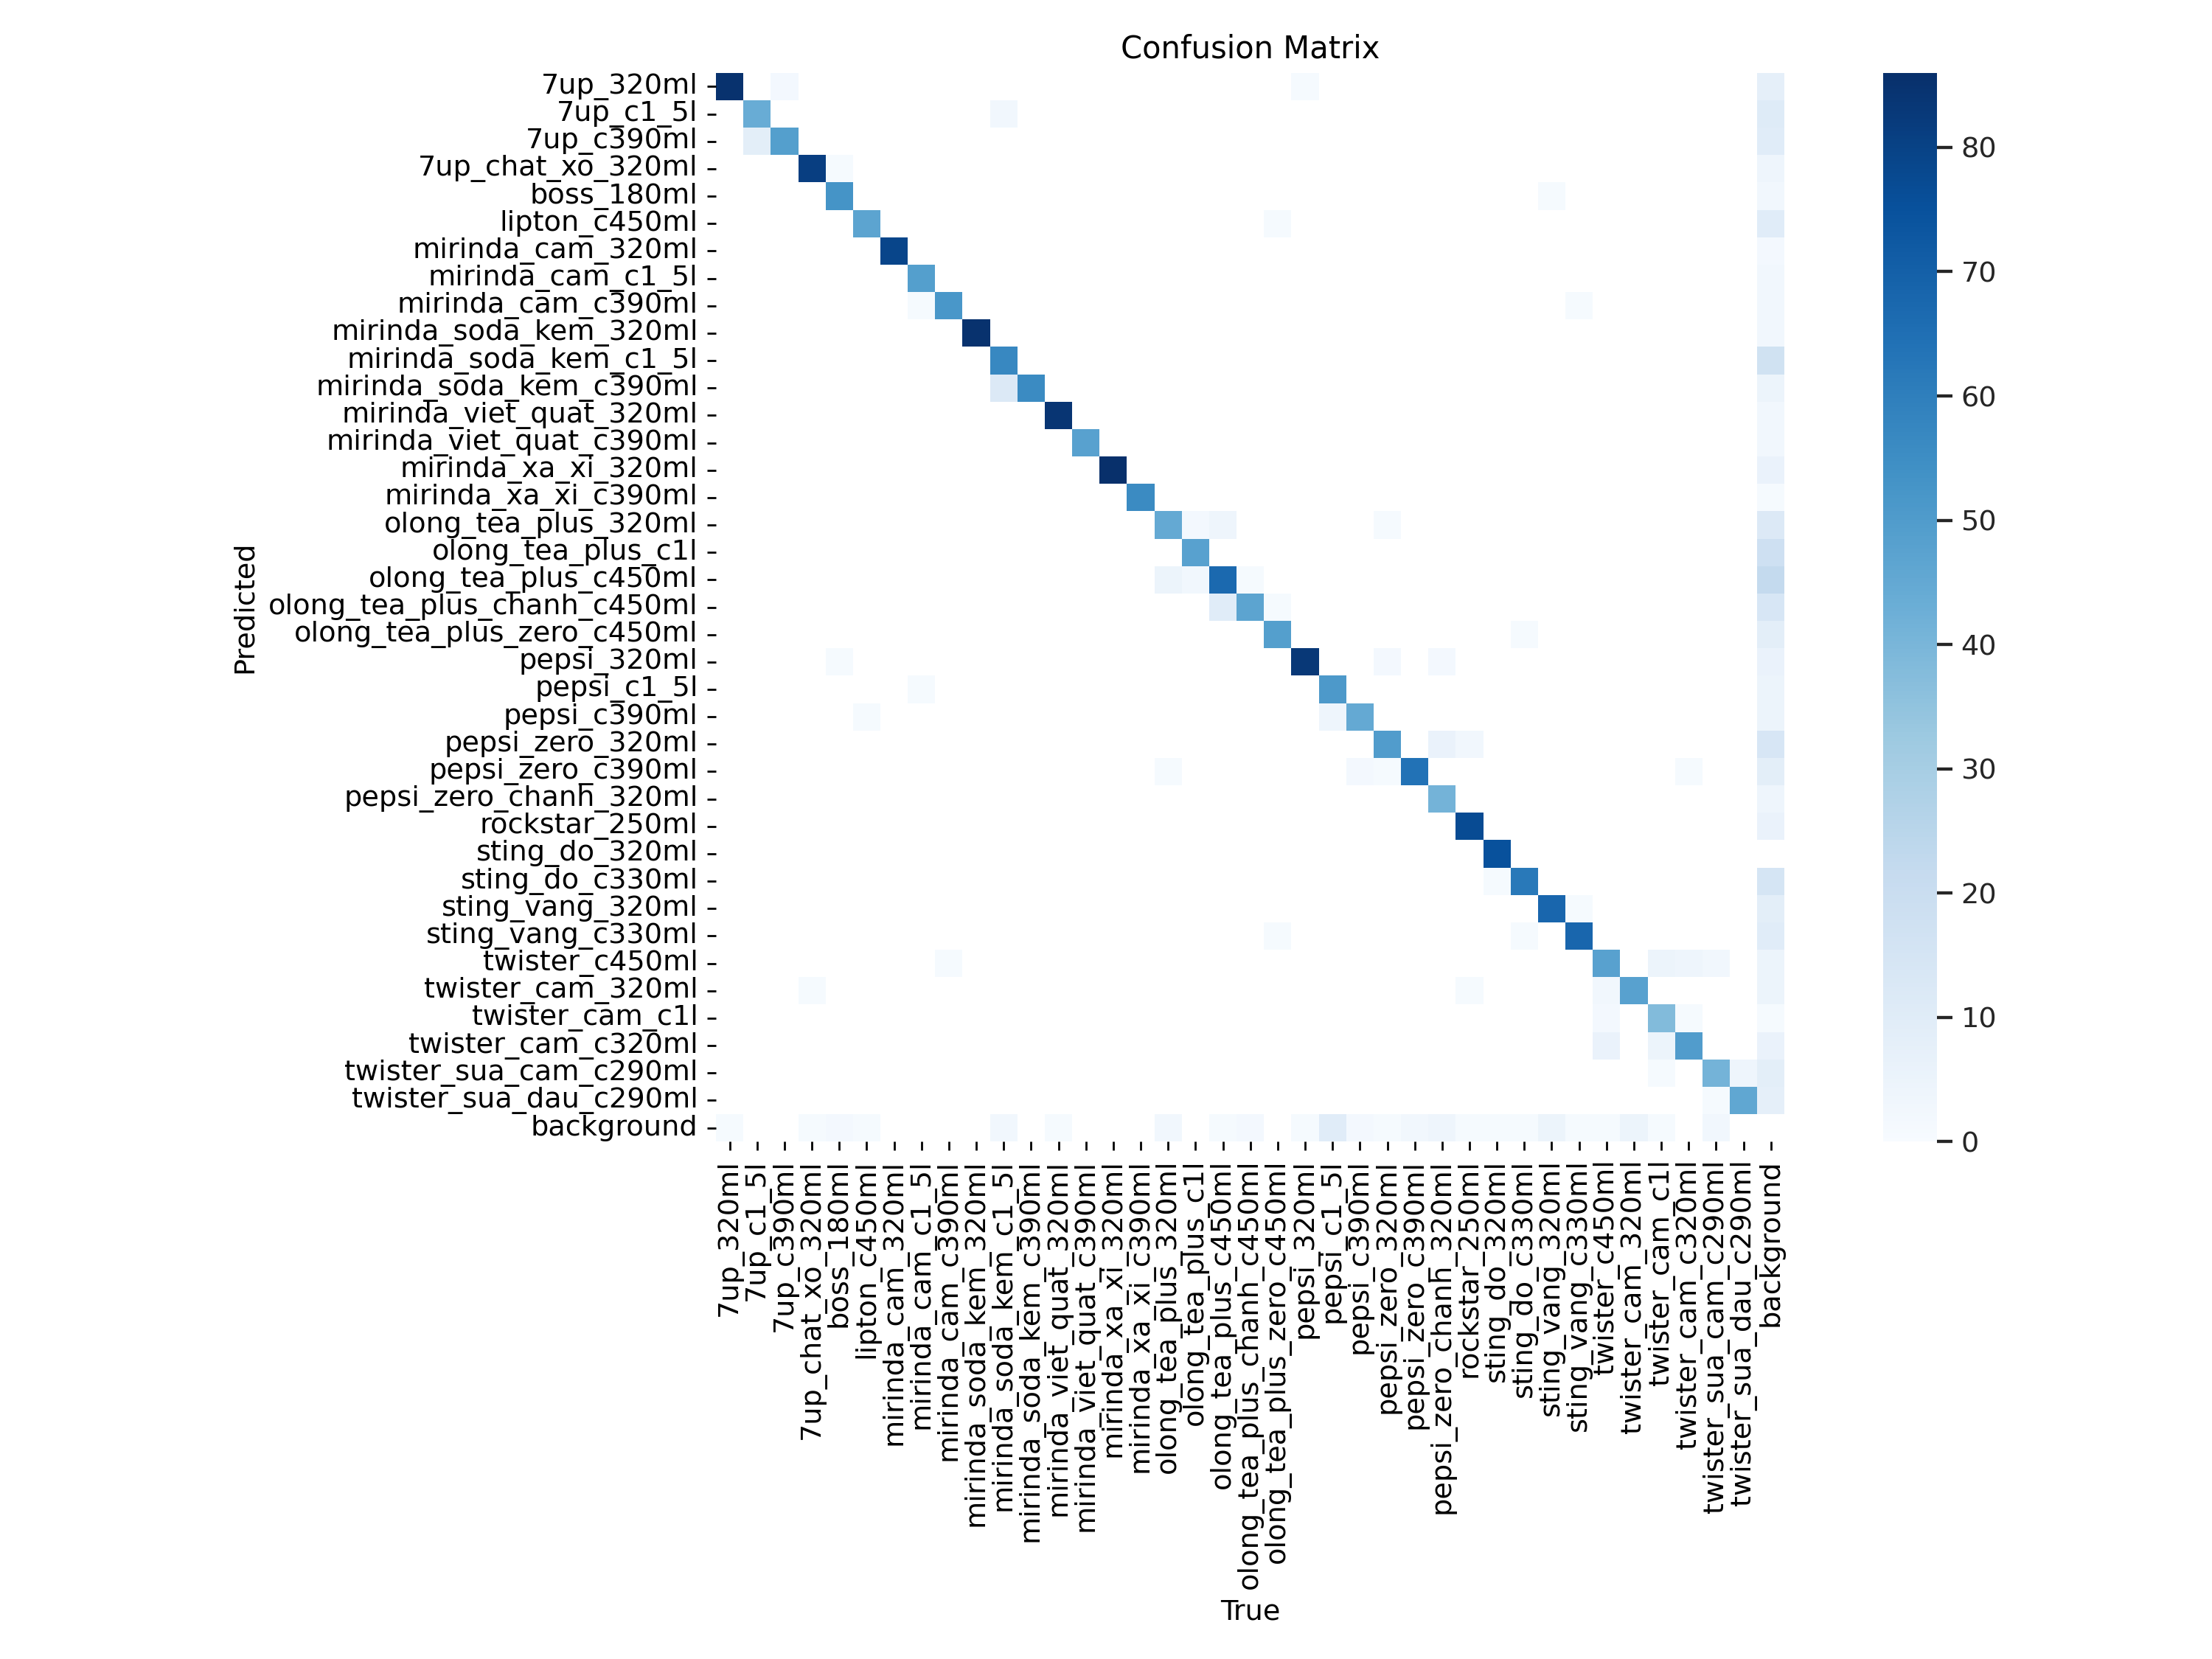

In [ ]:
# Confusion matrix shows how our model handles different classes
Image(filename=os.path.join(drive_folder, 'runs/detect/train/confusion_matrix.png'), width=1500)

#**Training and Validation Loss**

- `train/box_loss`: This is the value of the loss function associated with predicting bounding boxes during the training process.
- `val/box_loss`: Similar to train/box_loss, but calculated during the validation process.
- `train/cls_loss`: This is the value of the loss function related to predicting the class of objects during the training process.
- `val/cls_loss`: Similar to train/cls_loss, but calculated during the validation process.
- `train/dfl_loss`: This is the value of the loss function related to adjusting the translation of bounding boxes during the training process.
- `val/dfl_loss`: Similar to train/dfl_loss, but calculated during the validation process.
- `metrics/precision(B)`: This is the accuracy of the model in predicting bounding boxes during the evaluation process. Precision is the ratio of accurately predicted boxes to the total predicted boxes.
- `metrics/recall(B)`: This is the coverage of the model in predicting bounding boxes during the evaluation process. Recall is the ratio of accurately predicted boxes to the total actual boxes.
- `metrics/mAP50(B)`: This is the average value of the Average Precision at the IoU threshold of 50% across all classes and images during the evaluation process.
- `metrics/mAP50-95(B)`: Similar to metrics/mAP50(B), but calculates the average accuracy from the IoU threshold of 50% to 95%.

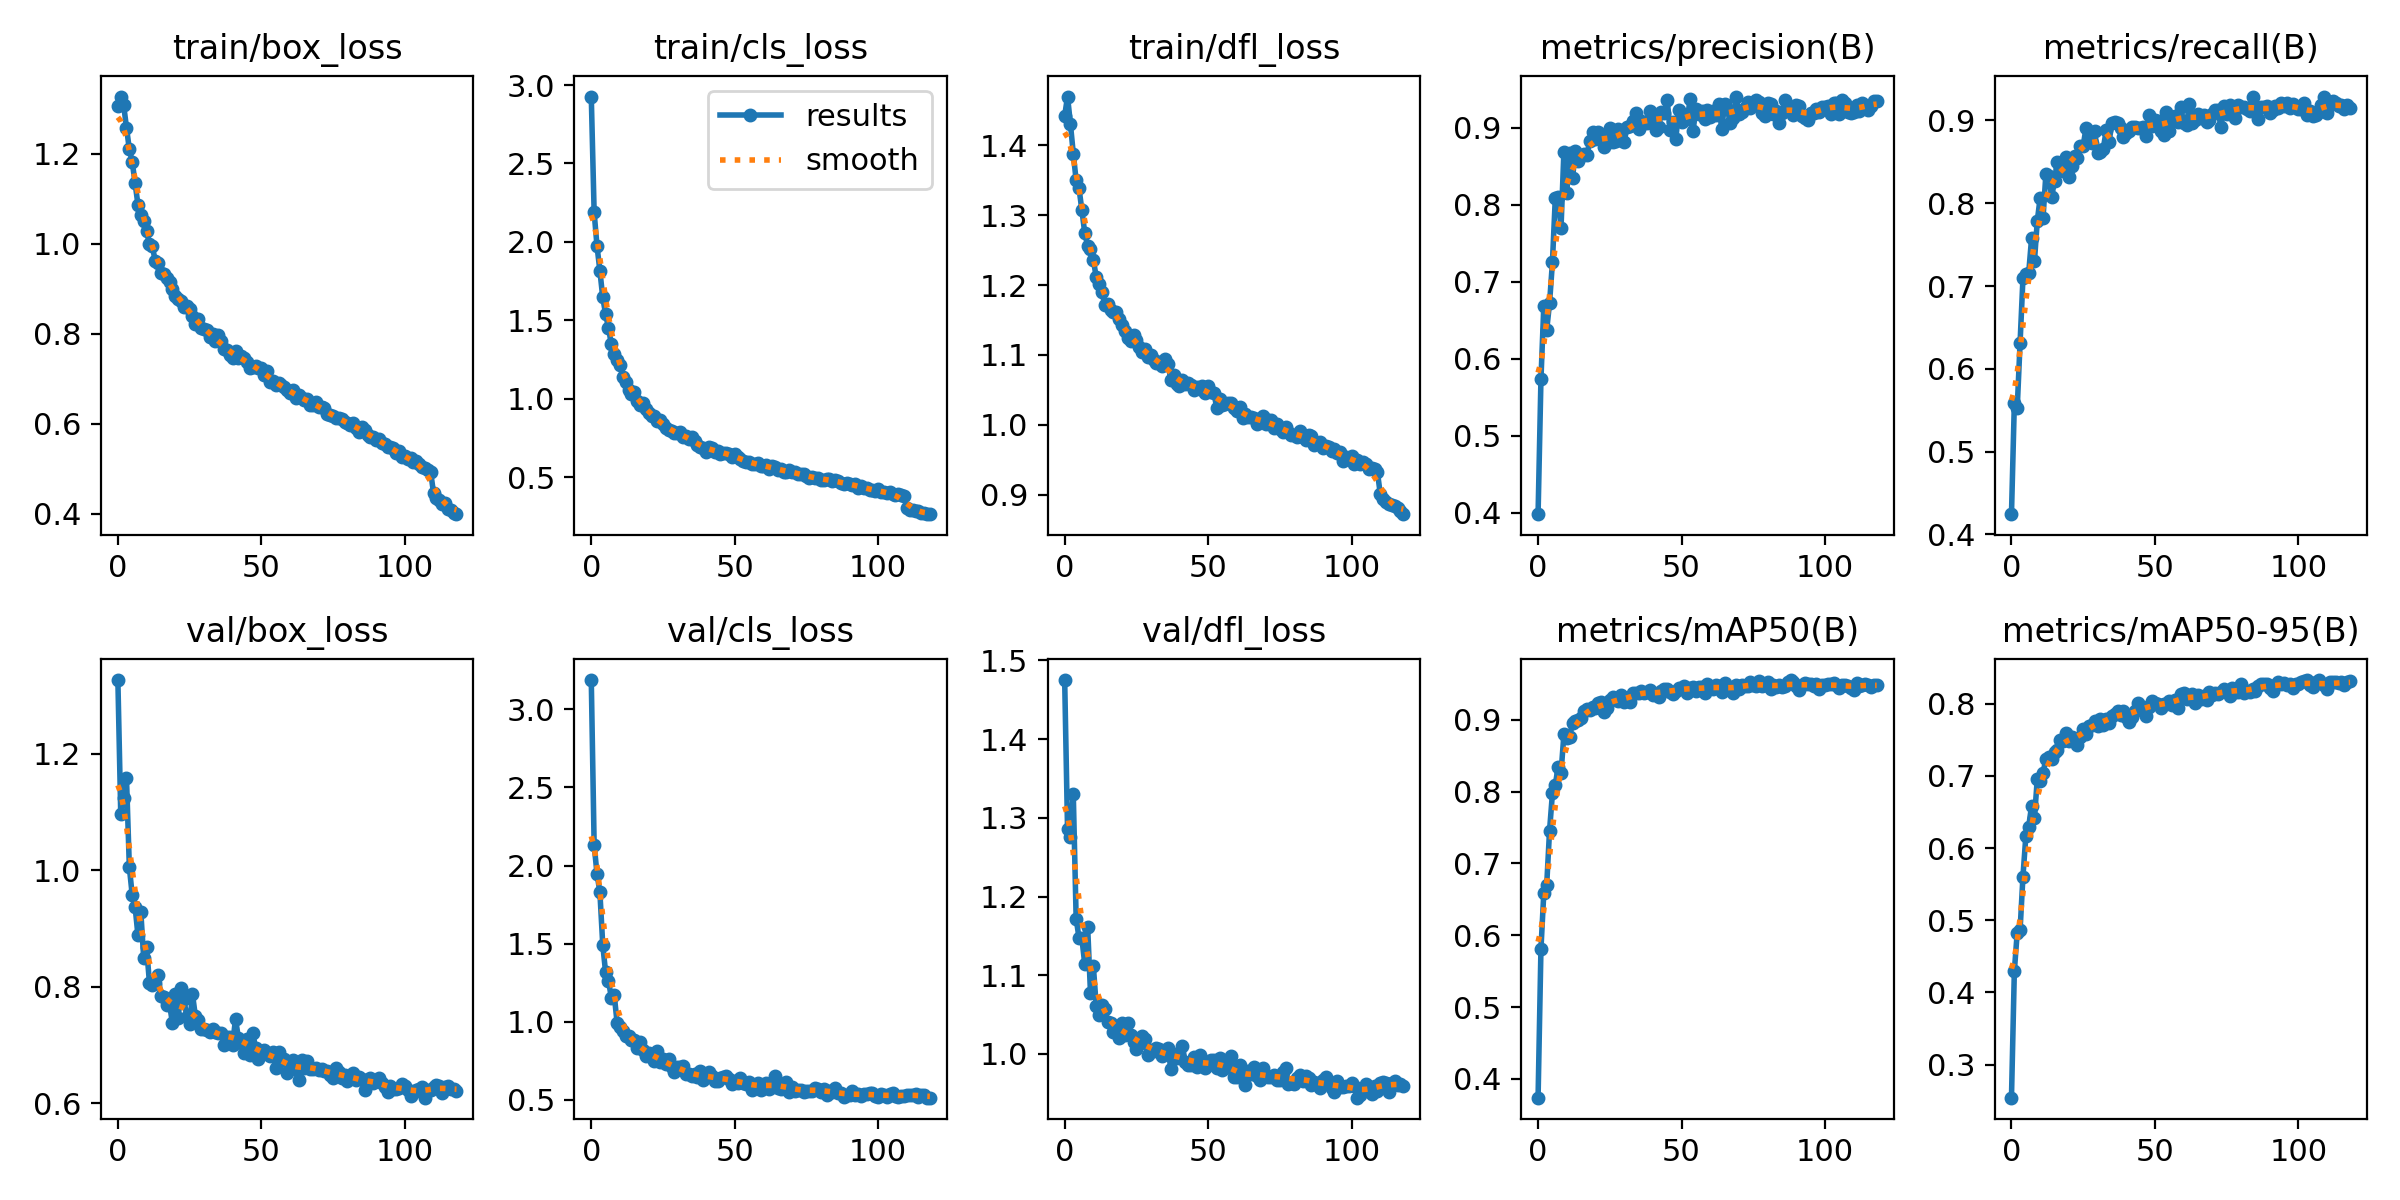

In [ ]:
# Training và validation loss graph
## Box loss and class loss are two important parameters.

Image(filename=os.path.join(drive_folder, 'runs/detect/train/results.png'), width=800)

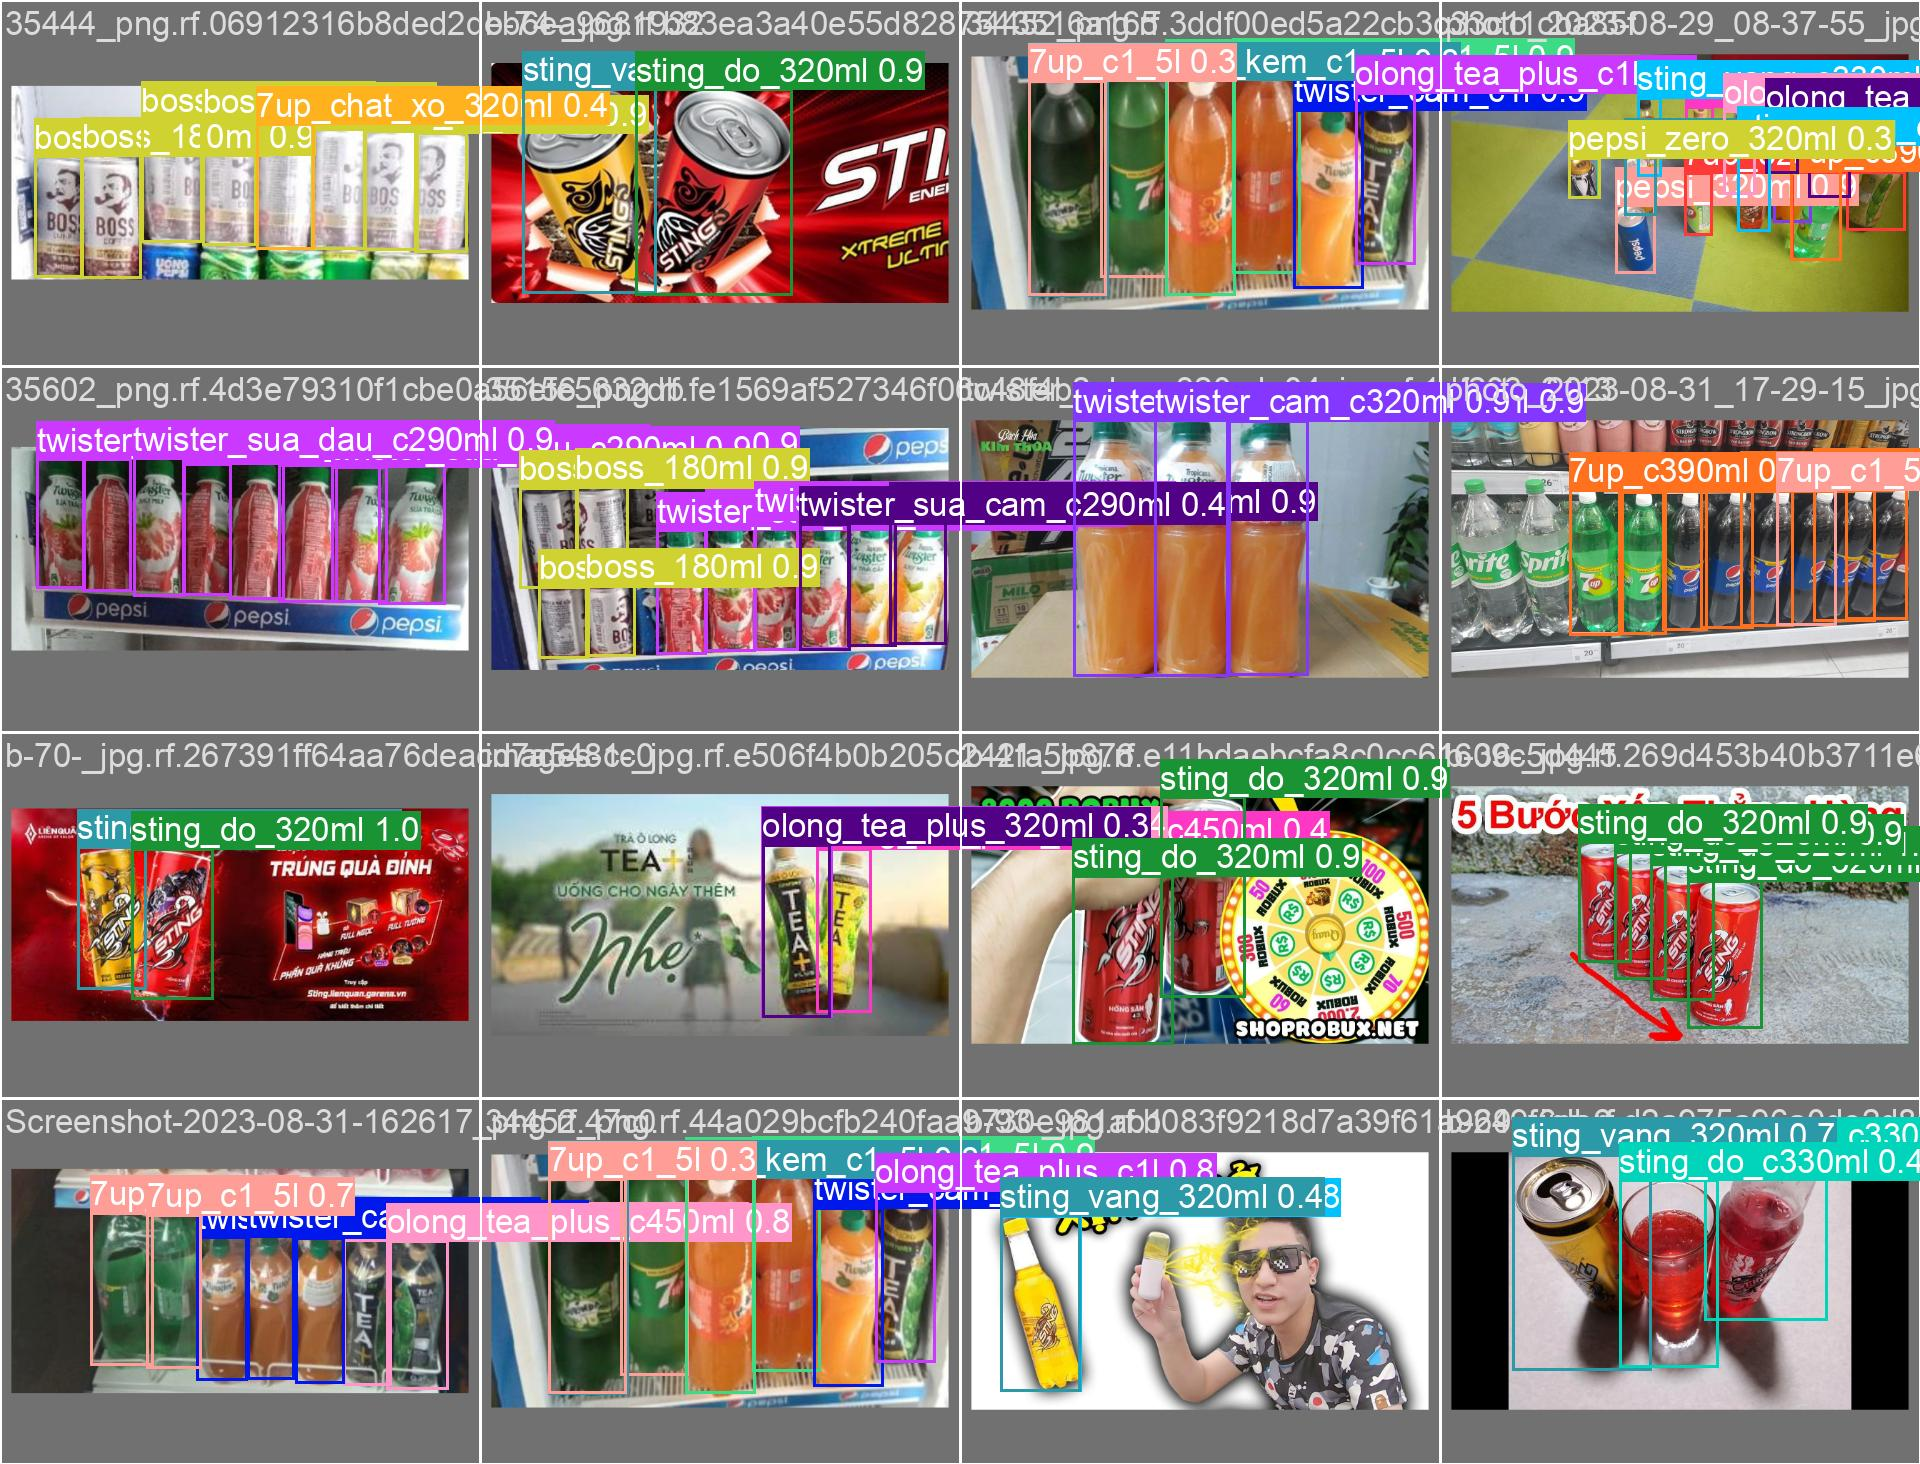

In [ ]:
# Model Prediction on validation batch.

Image(filename=os.path.join(drive_folder, 'runs/detect/train/val_batch0_pred.jpg'), width=600)


# Validate Custom Model

- `Class`: The specific object that the detection model is being evaluated on.
- `Images`: The number of images in the test dataset used to evaluate the model.
- `Instances`: The total count of detected object instances across all images in the test dataset.
- `Box (Precision - P)`: The ratio of accurately detected bounding boxes to the total predicted boxes. It measures the model's ability to create bounding boxes without errors.
- `Recall (R)`: The ratio of accurately detected bounding boxes to the total actual boxes in the test dataset. It measures the model's ability to capture all real objects.
- `mAP50 (Mean Average Precision at 50)`: is an evaluation metric for the accuracy of object detection models. It combines both Precision and Recall. The mAP50 value measures the model's accurate object detection ability with a Precision threshold at 50%.
- `mAP50-95 (Mean Average Precision from 50% to 95% IoU)`: is a similar metric to mAP50, but it evaluates accuracy at different IoU thresholds ranging from 50% to 95%. IoU is the threshold that measures the overlap between bounding boxes.

In [ ]:
# sử dụng = val thay vì train.
!yolo task=detect mode=val model=f'"{os.path.join(drive_folder, 'runs/detect/train/weights/best.pt')}"' data={yaml_location}

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25861762 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Colab Notebooks/soft-drink-detection/datasets/valid/labels.cache... 397 images, 0 backgrounds, 0 corrupt: 100% 397/397 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:13<00:00,  1.83it/s]
                   all        397       2404      0.937      0.902      0.951      0.834
             7up_320ml        397         86      0.939      0.988      0.987      0.895
             7up_c1_5l        397         53      0.931      0.679       0.94      0.762
            7up_c390ml        397         51      0.858      0.945      0.962      0.878
     7up_chat_xo_320ml        397         83          1      0.936      0.994      0.891
            boss_180ml        397         57      0.964       0.93      0.984      0.802
         li